# Alhitawi Mohammed P622VN 

 2-armed bandit situation
Importing libreires 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

Set Value Parameters 

In [2]:
Case_A_P_jam         =  0.61    #P(jam)
Case_A_Reward_jam    = -51.00   #Reward(jam)
Case_A_Reward_normal = -15.00   #Reward(normal)

Case_B_P_jam         =  0.58    #P(jam)
Case_B_Reward_jam    = -54.00   #Reward(jam)
Case_B_Reward_normal = -29.00   #Reward(normal)

print(Case_A_P_jam,Case_A_Reward_jam,Case_A_Reward_normal,
      Case_B_P_jam,Case_B_Reward_jam,Case_B_Reward_normal)

0.61 -51.0 -15.0 0.58 -54.0 -29.0


In [3]:
# second case
Case_A_P_jam2         =  0.91    #P(jam)
Case_A_Reward_jam2    = -44      #Reward(jam)
Case_A_Reward_normal2 = -27      #Reward(normal)

Case_B_P_jam2         =  0.86    #P(jam)
Case_B_Reward_jam2    = -53      #Reward(jam)
Case_B_Reward_normal2 = -18      #Reward(normal)

print(Case_A_P_jam2,Case_A_Reward_jam2,Case_A_Reward_normal2,
      Case_B_P_jam2,Case_B_Reward_jam2,Case_B_Reward_normal2)

0.91 -44 -27 0.86 -53 -18


In [4]:
#This function will do calculation to return the expected reward by using follwing formula 
# Ereward = Pjam * Rewardjam + Pnormal*Rewardnormal
def Calculate_reward(A,case=1):
  rand = random.random()
  
  if case == 1 and A == 0:
    if rand < Case_A_P_jam:
      Ereward = Case_A_P_jam * Case_A_Reward_jam  + (1-Case_A_P_jam) * Case_A_Reward_normal
    else:
      Ereward = (1-Case_A_P_jam) * Case_A_Reward_normal
    
  elif case == 1 and A == 1:
    if rand < Case_B_P_jam:
      Ereward = Case_B_P_jam * Case_B_Reward_jam + (1-Case_B_P_jam) * Case_B_Reward_normal

    else:
      Ereward = (1-Case_B_P_jam2) * Case_B_Reward_normal2  
  if case == 2 and A == 0:
    if rand < Case_A_P_jam2:
      Ereward = Case_A_P_jam2 * Case_A_Reward_jam2 + (1-Case_A_P_jam2) * Case_A_Reward_normal2
    else:
      Ereward = (1-Case_A_P_jam2) * Case_A_Reward_normal2

  elif case == 2 and A == 1:
    if rand < Case_B_P_jam2:
      Ereward = Case_B_P_jam2 * Case_B_Reward_jam2 + (1-Case_B_P_jam2) * Case_B_Reward_normal2
    else:
      Ereward = (1-Case_B_P_jam2) * Case_B_Reward_normal2
  return Ereward

In [5]:
nu_steps = 1000
# discount Rate  is less than 1 will not effect our result but we will benfite from it 
# in optimazation 
gamma = 0.99      
max_epsilon = 1.0             
min_epsilon = 0.01            
decay_rate = 0.005            

Calculating action value state 

In [6]:
def Q_learning(nu_steps,case = 1):  # Start with case one by default
# initilaze the table   
  Q_table = np.array([0.0,0.0])
  rewards_A = []
  rewards_B = []
  trackingList = []
  epsilon = 1.0 
# Set of action which represent BradgeA or BradgeB
  A = [0,1]   
  x = range(nu_steps)
  for episode in x :      
    exp_tradeoff = random.random()
    # If this condition true then do  --> exploitation (by choosing  the biggest Qu value for this state)
    if exp_tradeoff > epsilon:
        A = np.argmax(Q_table)   
    else:
        A = random.choice([0,1])  # Else doing a random choice --> exploration 
    # getting expectation reward 
    E_reward = Calculate_reward(A,case)
    if A == 0:
      rewards_A.append(E_reward)
    else:
      rewards_B.append(E_reward)
    Q_table[A] =  E_reward + gamma * Q_table[A]
    trackingList.append([episode,Q_table[0],Q_table[1]])    
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    # to get  less exploration
  print("Q-table" , Q_table)
  return rewards_A , rewards_B , trackingList 
# Calling the function 
rewards_of_bridge_A , rewards_of_bridge_B , List_case1= Q_learning(nu_steps,case=1)

Q-table [-2299.81192601 -2549.12651153]


In [7]:
print(f"Bridge A was chosen  {len(rewards_of_bridge_A)}")
print(f"Bridge B was chosen  {len(rewards_of_bridge_B)}")

Bridge A was chosen  736
Bridge B was chosen  264


Function to Calculate and print the average reward of bridge A and B in the in both cases 

In [8]:
def av_best(x,y,case):
    BradgeA = np.sum(x)/len(x)
    BradgeB = np.sum(y)/len(y)
    print(f"The average reward of bridge A, in {case} case : " , BradgeA)
    print(f"The average reward of bridge B, in {case} case : " , BradgeB)
    print("The best way is : ",max(BradgeA,BradgeB))

In [9]:
av_best(rewards_of_bridge_A,rewards_of_bridge_B, case= 'first')

The average reward of bridge A, in first case :  -22.926684782608696
The average reward of bridge B, in first case :  -27.666818181818183
The best way is :  -22.926684782608696


In [10]:
# trackingList_case1

# Vitulize first case 

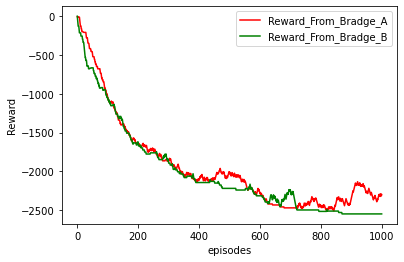

In [11]:
episodes1 ,R_A1,R_B1= [], [] , []
for key in List_case1:
  episodes1.append(key[0])
  R_A1.append(key[1])
  R_B1.append(key[2])

plt.plot(episodes1, R_A1, 'r', label='Reward_From_Bradge_A') 
plt.plot(episodes1, R_B1, 'g', label='Reward_From_Bradge_B') 

plt.xlabel('episodes')
plt.ylabel('Reward')
plt.legend()
plt.show()

# Second Case 

In [12]:
rewards_A_case2 , rewards_B_case2 , List_case2= Q_learning(nu_steps,case=2)

Q-table [-3930.97358468 -3981.94293084]


In [13]:
print(f"Bridge A was chosen {str(len(rewards_A_case2))}")
print(f"Bridge A was chosen {str(len(rewards_B_case2))}")

Bridge A was chosen 754
Bridge A was chosen 246


In [14]:
# Calculate and print the average reward of bridge A and B in the second case
av_best(rewards_A_case2,rewards_B_case2, case= 'Second')

The average reward of bridge A, in Second case :  -38.96517241379311
The average reward of bridge B, in Second case :  -43.467886178861804
The best way is :  -38.96517241379311


# Vitulize second case 

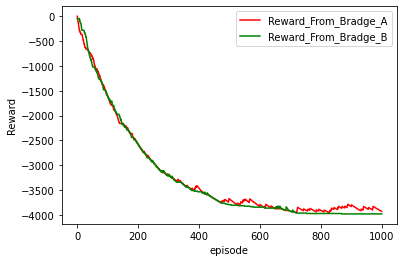

In [15]:
episodes2 ,R_A2 ,R_B2= [], [],[]
for key in List_case2:
  episodes2.append(key[0])
  R_A2.append(key[1])
  R_B2.append(key[2])

plt.plot(episodes2, R_A2, 'r', label='Reward_From_Bradge_A') 
plt.plot(episodes2, R_B2, 'g', label='Reward_From_Bradge_B') 

plt.xlabel('episode')
plt.ylabel('Reward')
plt.legend()
plt.show()

- We want the agent eather to do exploration or explotation in environment in 1000 epizodie 
- in first case the program did best where the Bradge A is the best way according to value calculation 
- but in the second case the program didnot the best (it should be the Bradge B)

- In what circumstances (jamming probabilities) could this problem be hard or easy? Why?
- in first case  the jamming will be in Braddge B
- while in  second case the jaming will be in Bradge A 
- this problem it will be easy for the agent because he can explore and explot and the other 
- thing the reward and probablity are Known in this task 
- when this R and P are missing we can the task is hard for agent 